### 1. Data Acquisition

#### Import Libraries

In [5]:
#data anlysis and wrangling
import pandas as pd
from pandas import Series
import numpy as np

In [6]:
#data visualization
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objs as go

In [7]:
#data modeling
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV

#### Read the Data

In [8]:
df = pd.read_csv('avocado.csv')
df.head(20)

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,27/12/2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,20/12/2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,13/12/2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,6/12/2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,29/11/2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
5,22/11/2015,1.26,55979.78,1184.27,48067.99,43.61,6683.91,6556.47,127.44,0.0,conventional,2015,Albany
6,15/11/2015,0.99,83453.76,1368.92,73672.72,93.26,8318.86,8196.81,122.05,0.0,conventional,2015,Albany
7,8/11/2015,0.98,109428.33,703.75,101815.36,80.00,6829.22,6266.85,562.37,0.0,conventional,2015,Albany
8,1/11/2015,1.02,99811.42,1022.15,87315.57,85.34,11388.36,11104.53,283.83,0.0,conventional,2015,Albany
9,25/10/2015,1.07,74338.76,842.40,64757.44,113.00,8625.92,8061.47,564.45,0.0,conventional,2015,Albany


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  object 
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   4046          18249 non-null  float64
 4   4225          18249 non-null  float64
 5   4770          18249 non-null  float64
 6   Total Bags    18249 non-null  float64
 7   Small Bags    18249 non-null  float64
 8   Large Bags    18249 non-null  float64
 9   XLarge Bags   18249 non-null  float64
 10  type          18249 non-null  object 
 11  year          18249 non-null  int64  
 12  region        18249 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 1.6+ MB


### 2. Data Cleaning

In [10]:
df.isnull().sum()

Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

No null values in our data. Great!

### 3. Data Wrangling

#### Create Month Column

In [11]:
def get_month(date):
    return date.split("/")[1]

df["Month"] = df["Date"].apply(lambda x: f"{get_month(x)}")

In [12]:
df.head(5)

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month
0,27/12/2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12
1,20/12/2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12
2,13/12/2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12
3,6/12/2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,12
4,29/11/2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11


#### Rearrange Month Column

In [13]:
cols = df.columns.tolist()
cols = cols[:1] + cols[-1:] + cols [1:-1]
cols

['Date',
 'Month',
 'AveragePrice',
 'Total Volume',
 '4046',
 '4225',
 '4770',
 'Total Bags',
 'Small Bags',
 'Large Bags',
 'XLarge Bags',
 'type',
 'year',
 'region']

#### Rearrange Year Column

In [14]:
cols = cols[0:2] + cols[-2:-1] + cols[2:-2] + cols[-1:]
cols

['Date',
 'Month',
 'year',
 'AveragePrice',
 'Total Volume',
 '4046',
 '4225',
 '4770',
 'Total Bags',
 'Small Bags',
 'Large Bags',
 'XLarge Bags',
 'type',
 'region']

#### Assign Rearranged Column into DataFrame

In [15]:
df = df[cols]
df.head(5)

,Date,Month,year,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region
0,27/12/2015,12,2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,Albany
1,20/12/2015,12,2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,Albany
2,13/12/2015,12,2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,Albany
3,6/12/2015,12,2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,Albany
4,29/11/2015,11,2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,Albany


#### Change to DateTime Format

In [16]:
df.columns

Index(['Date', 'Month', 'year', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'region'],
      dtype='object')

In [17]:
df['Date'] = pd.to_datetime(df['Date'])
df.head(5)

,Date,Month,year,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region
0,2015-12-27,12,2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,Albany
1,2015-12-20,12,2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,Albany
2,2015-12-13,12,2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,Albany
3,2015-06-12,12,2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,Albany
4,2015-11-29,11,2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,Albany


#### Create Sales Column

In [18]:
df["Sales"] = df["AveragePrice"]*df["Total Volume"]

In [19]:
cols = df.columns.tolist()
cols

['Date',
 'Month',
 'year',
 'AveragePrice',
 'Total Volume',
 '4046',
 '4225',
 '4770',
 'Total Bags',
 'Small Bags',
 'Large Bags',
 'XLarge Bags',
 'type',
 'region',
 'Sales']

In [20]:
cols = cols[0:5] + cols[-1:] + cols[5:-1]
cols

['Date',
 'Month',
 'year',
 'AveragePrice',
 'Total Volume',
 'Sales',
 '4046',
 '4225',
 '4770',
 'Total Bags',
 'Small Bags',
 'Large Bags',
 'XLarge Bags',
 'type',
 'region']

In [21]:
df = df[cols]
df.head(20)

,Date,Month,year,AveragePrice,Total Volume,Sales,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region
0,2015-12-27,12,2015,1.33,64236.62,85434.7046,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,Albany
1,2015-12-20,12,2015,1.35,54876.98,74083.9230,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,Albany
2,2015-12-13,12,2015,0.93,118220.22,109944.8046,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,Albany
3,2015-06-12,12,2015,1.08,78992.15,85311.5220,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,Albany
4,2015-11-29,11,2015,1.28,51039.60,65330.6880,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,Albany
5,2015-11-22,11,2015,1.26,55979.78,70534.5228,1184.27,48067.99,43.61,6683.91,6556.47,127.44,0.0,conventional,Albany
6,2015-11-15,11,2015,0.99,83453.76,82619.2224,1368.92,73672.72,93.26,8318.86,8196.81,122.05,0.0,conventional,Albany
7,2015-08-11,11,2015,0.98,109428.33,107239.7634,703.75,101815.36,80.00,6829.22,6266.85,562.37,0.0,conventional,Albany
8,2015-01-11,11,2015,1.02,99811.42,101807.6484,1022.15,87315.57,85.34,11388.36,11104.53,283.83,0.0,conventional,Albany
9,2015-10-25,10,2015,1.07,74338.76,79542.4732,842.40,64757.44,113.00,8625.92,8061.47,564.45,0.0,conventional,Albany


### EDA & Data Visualization

#### How many avocados sold in each specific year?

In [22]:
from IPython.display import display

In [23]:
display(df.groupby(["year", "Month"])["Sales"].mean().to_frame())

Sales
year Month              
2015 1      7.490031e+05
     10     7.273975e+05
     11     6.652004e+05
     12     6.485339e+05
     2      8.180924e+05
     3      7.968672e+05
     4      8.434692e+05
     5      9.218589e+05
     6      9.054344e+05
     7      8.832038e+05
     8      8.364368e+05
     9      7.908399e+05
2016 1      8.191253e+05
     10     8.797953e+05
     11     8.017731e+05
     12     7.651406e+05
     2      8.635290e+05
     3      8.577275e+05
     4      8.506721e+05
     5      9.295103e+05
     6      9.777752e+05
     7      1.000900e+06
     8      9.661298e+05
     9      9.490847e+05
2017 1      9.510749e+05
     10     1.023499e+06
     11     9.064891e+05
     12     9.220569e+05
     2      9.823680e+05
     3      1.010769e+06
     4      1.103641e+06
     5      1.194291e+06
     6      1.160906e+06
     7      1.125104e+06
     8      1.099179e+06
     9      1.054260e+06
2018 1      1.139032e+06
     2      1.152246e+06
     3      1.140070e+06

#### Which region sold the most avocados?

In [24]:
results_region = df.groupby("region").sum()
results_region

,year,AveragePrice,Total Volume,Sales,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags
region,,,,,,,,,,,
Albany,681458,527.63,1.606780e+07,2.176672e+07,6.165396e+05,1.271597e+07,5.503733e+04,2.680255e+06,2.246945e+06,3.898817e+05,43429.16
Atlanta,681458,452.23,8.860512e+07,9.379337e+07,4.938750e+07,1.055186e+07,1.052484e+05,2.856051e+07,1.744274e+07,1.083968e+07,278101.68
BaltimoreWashington,681458,518.57,1.347139e+08,1.799084e+08,1.205180e+07,8.314222e+07,4.213755e+06,3.530615e+07,3.411761e+07,9.815468e+05,206985.36
Boise,681458,455.67,1.441319e+07,1.534667e+07,6.766594e+06,1.170049e+06,1.077134e+06,5.399412e+06,4.677933e+06,7.110283e+05,10449.34
Boston,681458,517.44,9.727398e+07,1.265429e+08,1.688178e+06,7.240631e+07,1.684016e+06,2.149548e+07,1.991043e+07,1.500167e+06,84879.99
BuffaloRochester,681458,512.69,2.296247e+07,3.154509e+07,6.005149e+05,1.070242e+07,4.878556e+04,1.161075e+07,1.026843e+07,1.260419e+06,81901.94
California,681458,471.62,1.028982e+09,1.121414e+09,3.989670e+08,3.514914e+08,3.184105e+07,2.466822e+08,2.290977e+08,1.231194e+07,5272577.91
Charlotte,681458,542.84,3.555554e+07,4.574304e+07,7.563811e+06,1.238027e+07,3.913522e+06,1.169794e+07,1.064385e+07,9.844872e+05,69603.59
Chicago,681458,526.19,1.337023e+08,1.791106e+08,1.084408e+07,8.602744e+07,1.996539e+07,1.686540e+07,1.479465e+07,1.691875e+06,378872.71


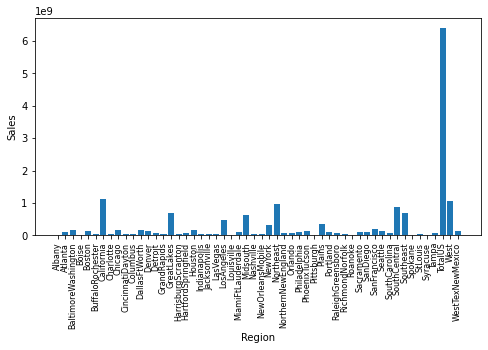

In [25]:
#organizing the sales according to the region
region = [region for region, df in df.groupby("region")]

plt.figure(figsize = (8,4))
plt.bar(region, results_region['Sales'])
plt.xticks(region, rotation = 'vertical', size = 8)
plt.xlabel('Region')
plt.ylabel('Sales')
plt.show()

TotalUS has the highest sales among other region! So,

#### How many avocados sold in TotalUS for each specific year?

In [26]:
display(df.loc[df["region"] == "TotalUS"].groupby(["year", "Month"])["Sales"].mean().to_frame())

Sales
year Month              
2015 1      1.529320e+07
     10     1.475342e+07
     11     1.348933e+07
     12     1.319361e+07
     2      1.671775e+07
     3      1.628481e+07
     4      1.723454e+07
     5      1.880934e+07
     6      1.849185e+07
     7      1.790390e+07
     8      1.700484e+07
     9      1.612095e+07
2016 1      1.667237e+07
     10     1.786105e+07
     11     1.628678e+07
     12     1.558520e+07
     2      1.758919e+07
     3      1.749338e+07
     4      1.735441e+07
     5      1.892735e+07
     6      1.991203e+07
     7      2.040821e+07
     8      1.969632e+07
     9      1.932665e+07
2017 1      1.939567e+07
     10     2.083199e+07
     11     1.842027e+07
     12     1.876437e+07
     2      1.996193e+07
     3      2.058507e+07
     4      2.247853e+07
     5      2.430959e+07
     6      2.356163e+07
     7      2.299512e+07
     8      2.244228e+07
     9      2.147512e+07
2018 1      2.316014e+07
     2      2.344324e+07
     3      2.323295e+07

#### What is the average price for each type of avocados?

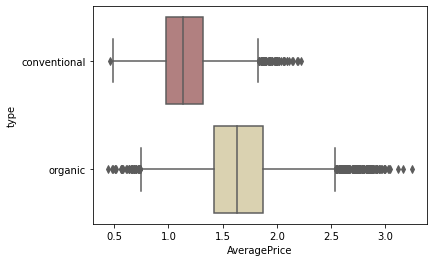

In [27]:
sns.boxplot(y = "type", x = "AveragePrice", data = df, palette = "pink")

Organic avocados are much more expensive compared to conventional avocados. The organic produce is limited in supply due to its challenging cultivation. Let's see how the average price of organic avocados differ in every region.

#### What was the average price for avocados in every region?

##### Organic avocados

c:\users\acer\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
c:\users\acer\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\categorical.py:3710: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
c:\users\acer\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


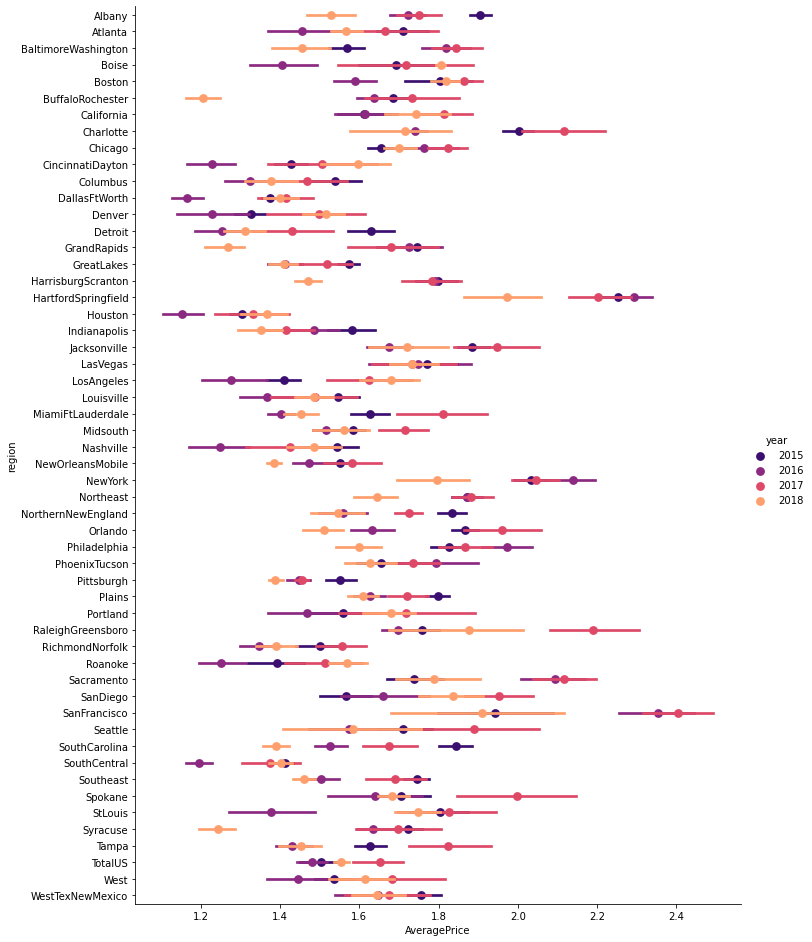

In [32]:
mask = df[df["type"] == "organic"]

g = sns.factorplot("AveragePrice", "region", data = mask,
                   hue = "year",
                   size = 13,
                   aspect = 0.8,
                   palette = "magma",
                   join = False
                  )

##### Conventional avocados

c:\users\acer\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
c:\users\acer\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\categorical.py:3710: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
c:\users\acer\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


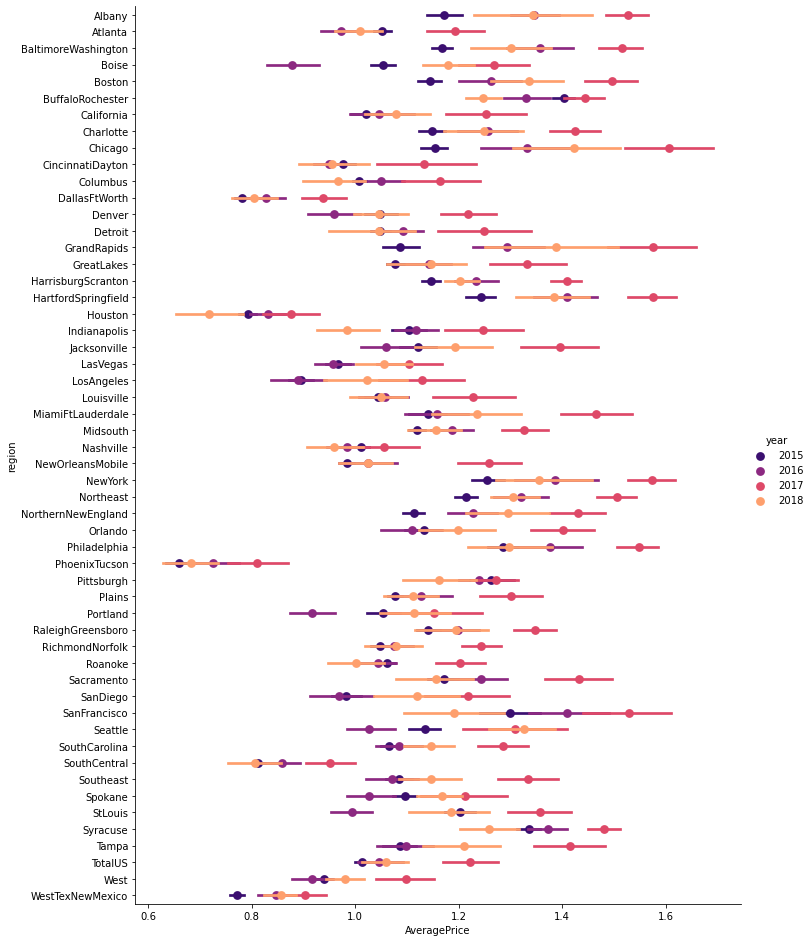

In [25]:
mask = df["type"] == "conventional"

g = sns.factorplot("AveragePrice", "region", data = df[mask],
                   hue = "year",
                   size = 13,
                   aspect = 0.8,
                   palette = "magma",
                   join = False
                  )

Charlotte has the highest average price for organic avocados in 2015 while HartforfSpringfield in 2016 and 2018, SanFranciso in 2017. There was a massive shortage in organic and conventional avocados supply in 2017. It explains the spike in overall average price for avocados in 2017 as can be seen below.

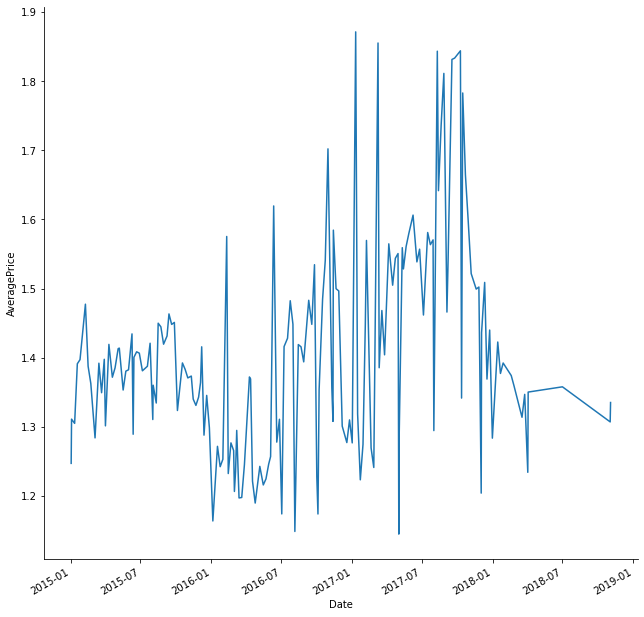

In [26]:
g = sns.relplot(x = "Date", y = "AveragePrice", kind = "line", ci = None, data = df)
g.fig.set_size_inches(10,10)
g.fig.autofmt_xdate()

#### Which avocado type sold the most?

In [27]:
max_sales = df.Sales.max()

In [28]:
df.loc[df.Sales == max_sales, "type"].unique()

array(['conventional'], dtype=object)

In [29]:
display(df.groupby("type")["Sales"].mean().to_frame())

,Sales
type,
conventional,1.781013e+06
organic,7.460359e+04


In [30]:
t = df.groupby("type")["Sales"].mean()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x124033B8>],
      dtype=object)

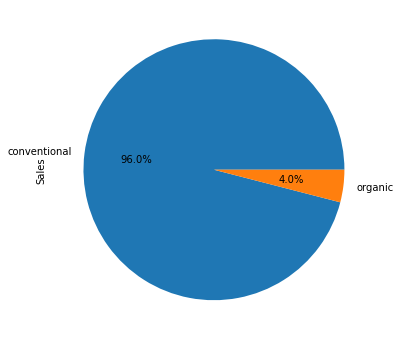

In [31]:
t.plot.pie(subplots = True, figsize = (10, 6), autopct='%1.1f%%')

As expected, organic avocados has the lowest sale due to its limited supply. The customers prefered conventional avocados compared to the organic ones due to their high retail price. Therefore, the customers value the affordable price more compared to the organic lifestyle.

#### What were the sales projection for every type of avocados in each region?

In [32]:
display(df.groupby(["year", "Month", "region", "type"])["Sales"].mean().to_frame())

Sales
year Month region              type                      
2015 1     Albany              conventional  5.022046e+04
                               organic       2.205045e+03
           Atlanta             conventional  4.623788e+05
                               organic       6.836066e+03
           BaltimoreWashington conventional  8.189454e+05
...                                                   ...
2018 3     TotalUS             organic       2.503165e+06
           West                conventional  7.073953e+06
                               organic       4.341966e+05
           WestTexNewMexico    conventional  8.076873e+05
                               organic       2.772397e+04

[4212 rows x 1 columns]

#### Does the average price affect the sales?

Year of 2017 has been chosen in order to analyze the impact of spike in average price to the sales projection.

In [33]:
display(df.groupby(["Month", "AveragePrice"])["Sales"].sum().to_frame())

Sales
Month AveragePrice             
1     0.51          752627.9457
      0.53          854974.6251
      0.54          864660.2472
      0.57          807808.5714
      0.58          800702.0408
...                         ...
9     2.92           30067.4444
      2.93            8929.6438
      2.94            6983.0586
      2.95            7131.7725
      2.97           41736.0735

[2254 rows x 1 columns]

In [34]:
display(df[(df["year"]== 2017)].groupby(["year", "Month"]).sum())

AveragePrice  Total Volume         Sales          4046  \
year Month                                                           
2017 1            689.85  5.333330e+08  5.135804e+08  1.712136e+08   
     10           946.32  3.627780e+08  5.526892e+08  1.218695e+08   
     11           655.47  3.245193e+08  3.916033e+08  1.129015e+08   
     12           736.48  4.593329e+08  4.979107e+08  1.507117e+08   
     2            524.79  4.714672e+08  4.243830e+08  1.626034e+08   
     3            604.34  3.589034e+08  4.366520e+08  1.185221e+08   
     4            811.41  4.898145e+08  5.959663e+08  1.629949e+08   
     5            662.08  4.257305e+08  5.159337e+08  1.439833e+08   
     6            664.52  4.104107e+08  4.991897e+08  1.382841e+08   
     7            845.06  4.749037e+08  6.075561e+08  1.562671e+08   
     8            733.95  3.383330e+08  4.748452e+08  1.147085e+08   
     9            795.29  2.847795e+08  4.554403e+08  9.797854e+07   

                    4225         4770    Total Bags    Small Bags  \
year Month                                                          
2017 1      1.817974e+08   9498638.21  1.708234e+08  1.298283e+08   
     10     1.192107e+08   5530608.22  1.161638e+08  8.726827e+07   
     11     9.625316e+07   4444966.77  1.109155e+08  7.889081e+07   
     12     1.507333e+08   7418798.35  1.504650e+08  1.116603e+08   
     2      1.497966e+08  11495508.65  1.475717e+08  1.119283e+08   
     3      1.102373e+08   7530658.51  1.226133e+08  9.441777e+07   
     4      1.447048e+08   8766296.40  1.733486e+08  1.303668e+08   
     5      1.228206e+08   7662119.71  1.512646e+08  1.111078e+08   
     6      1.170058e+08   7491250.97  1.476295e+08  1.080191e+08   
     7      1.519414e+08   9825001.23  1.568595e+08  1.143067e+08   
     8      1.075352e+08   6543769.49  1.095437e+08  7.815097e+07   
     9      9.269849e+07   5009891.27  8.909009e+07  6.700744e+07   

             Large Bags  XLarge Bags  
year Month                            
2017 1      39919720.64   1075376.76  
     10     28087914.81    807666.20  
     11     31047519.71    977173.28  
     12     37271650.87   1533081.89  
     2      34097413.26   1545944.47  
     3      26513466.99   1682061.42  
     4      40613919.42   2367875.45  
     5      37682693.10   2474086.86  
     6      36556190.89   3054212.20  
     7      38335645.99   4217174.16  
     8      28565156.32   2827612.00  
     9      20647748.13   1434907.65

In [35]:
year = df[(df["year"]== 2017)].groupby(["year", "Month"]).sum()
display(year["AveragePrice"])

year  Month
2017  1        689.85
      10       946.32
      11       655.47
      12       736.48
      2        524.79
      3        604.34
      4        811.41
      5        662.08
      6        664.52
      7        845.06
      8        733.95
      9        795.29
Name: AveragePrice, dtype: float64

In [36]:
month = [m for m, df in df[df["year"]== 2017].groupby(["Month"])]
#month = range(1,13)
month

['1', '10', '11', '12', '2', '3', '4', '5', '6', '7', '8', '9']

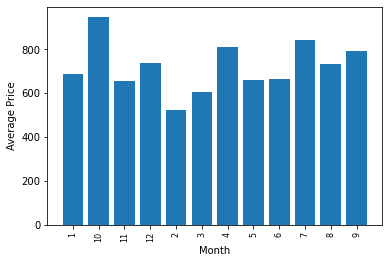

In [37]:
plt.bar(month, year["AveragePrice"])
plt.xticks(month, rotation = 'vertical', size = 8)
plt.xlabel("Month")
plt.ylabel("Average Price")
plt.show()

In [38]:
year = df[(df["year"]== 2017)].groupby(["year", "Month"]).sum()
display(year["Sales"])

year  Month
2017  1        5.135804e+08
      10       5.526892e+08
      11       3.916033e+08
      12       4.979107e+08
      2        4.243830e+08
      3        4.366520e+08
      4        5.959663e+08
      5        5.159337e+08
      6        4.991897e+08
      7        6.075561e+08
      8        4.748452e+08
      9        4.554403e+08
Name: Sales, dtype: float64

c:\users\acer\appdata\local\programs\python\python38-32\lib\site-packages\matplotlib\cbook\__init__.py:1329: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
c:\users\acer\appdata\local\programs\python\python38-32\lib\site-packages\matplotlib\axes\_base.py:350: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


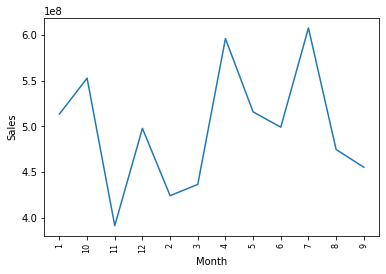

In [39]:
plt.plot(month, year["Sales"])
plt.xticks(month, rotation = 'vertical', size = 8)
plt.xlabel("Month")
plt.ylabel("Sales")
plt.show()

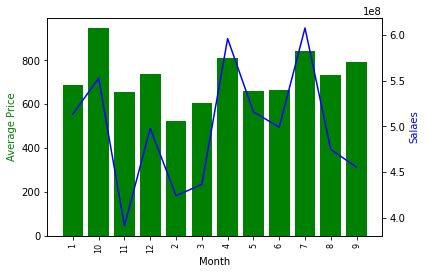

In [40]:
fig, ax1 = plt.subplots()

#intertwine 2 graphs
ax2 = ax1.twinx()
ax1.bar(month, year["AveragePrice"], color ='g')
ax2.plot(month, year["Sales"], 'b-')

ax1.set_xlabel('Month')
ax1.set_ylabel('Average Price', color = 'g')
ax2.set_ylabel ('Salaes', color = 'b')
ax1.set_xticklabels(month, rotation = 'vertical', size = 8)

plt.show()

As can be seen, expensive avocados did not necessarily causing loss is sales. April and July have the highest sales although the average price was quite high. People seems to love eating avocados during early spring and summer, who knows?

#### Which region sold the most bags of avocados?

In [41]:
df.head(5)

,Date,Month,year,AveragePrice,Total Volume,Sales,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region
0,2015-12-27,12,2015,1.33,64236.62,85434.7046,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,Albany
1,2015-12-20,12,2015,1.35,54876.98,74083.9230,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,Albany
2,2015-12-13,12,2015,0.93,118220.22,109944.8046,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,Albany
3,2015-06-12,12,2015,1.08,78992.15,85311.5220,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,Albany
4,2015-11-29,11,2015,1.28,51039.60,65330.6880,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,Albany


In [42]:
display(df.groupby("region")["Total Bags"].sum().to_frame())

,Total Bags
region,
Albany,2.680255e+06
Atlanta,2.856051e+07
BaltimoreWashington,3.530615e+07
Boise,5.399412e+06
Boston,2.149548e+07
BuffaloRochester,1.161075e+07
California,2.466822e+08
Charlotte,1.169794e+07
Chicago,1.686540e+07


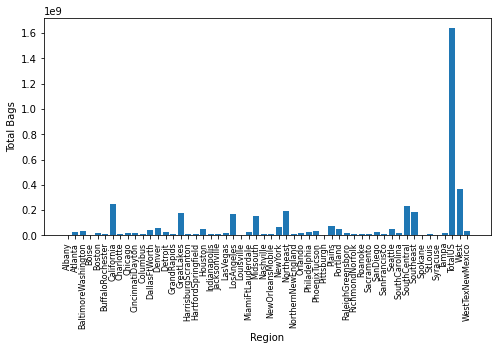

In [43]:
#organizing the sales according to the region
totalbags = [bags for bags, df in df.groupby("region")]

plt.figure(figsize = (8,4))
plt.bar(totalbags, results_region['Total Bags'])
plt.xticks(region, rotation = 'vertical', size = 8)
plt.xlabel('Region')
plt.ylabel('Total Bags')
plt.show()

TotalUS region sold the most avocados bags. No wonder it has the highest sales.

#### How many bags of avocados sold every year?

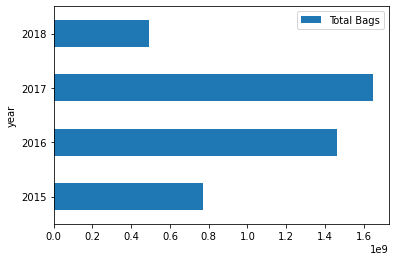

In [44]:
df[["Total Bags", "year"]].groupby("year").sum().plot(kind = "barh")

This is interesting. The spike in demand while having low supply for avocados in 2017 explains the spike in average price. Make sense!

#### Which size of avocados bag sold the most?

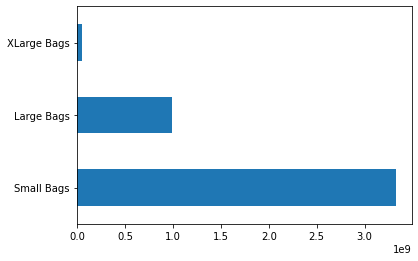

In [45]:
df[["Small Bags", "Large Bags", "XLarge Bags"]].sum().plot(kind = "barh")

Seems like small bags of avocados were much more preferable compared to the larger ones. Avocados are usually consumed or served as side dishes (mostly in salad) so it might not necessary to buy large bags of avocados. 

#### Which region has the highest demand for XL bag size of avocados?

In [46]:
display(df.loc[df["XLarge Bags"] > 0].groupby("region")["XLarge Bags"].sum().to_frame())

,XLarge Bags
region,
Albany,43429.16
Atlanta,278101.68
BaltimoreWashington,206985.36
Boise,10449.34
Boston,84879.99
BuffaloRochester,81901.94
California,5272577.91
Charlotte,69603.59
Chicago,378872.71


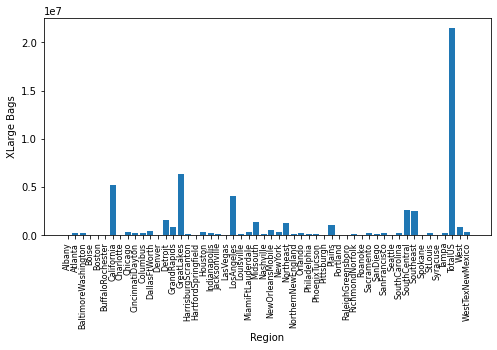

In [47]:
#organizing the sales according to the region
XLBags = [xl for xl, df in df.groupby("region")]

plt.figure(figsize = (8,4))
plt.bar(XLBags, results_region['XLarge Bags'])
plt.xticks(region, rotation = 'vertical', size = 8)
plt.xlabel('Region')
plt.ylabel('XLarge Bags')
plt.show()

TotalUS must looove their avocados! We have loyal customers here, people!

### 4. Data Modeling

#### Encoding Categorical Variables

In [48]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
dicts = {}

##### "type" variable

In [49]:
label.fit(df.type.drop_duplicates())
dicts["type"] = list(label.classes_)
df.type = label.transform(df.type)

##### "region" variable

In [50]:
label.fit(df.region.drop_duplicates())
dicts["region"] = list(label.classes_)
df.region = label.transform(df.region)

#### Find Correlations

In [51]:
df.head(5)

,Date,Month,year,AveragePrice,Total Volume,Sales,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region
0,2015-12-27,12,2015,1.33,64236.62,85434.7046,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,0
1,2015-12-20,12,2015,1.35,54876.98,74083.9230,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,0
2,2015-12-13,12,2015,0.93,118220.22,109944.8046,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,0
3,2015-06-12,12,2015,1.08,78992.15,85311.5220,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,0
4,2015-11-29,11,2015,1.28,51039.60,65330.6880,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,0


In [52]:
df_hm = df[["AveragePrice", "type", "year", "Total Volume", "Total Bags", "region"]]

In [53]:
corrm = df_hm.corr()

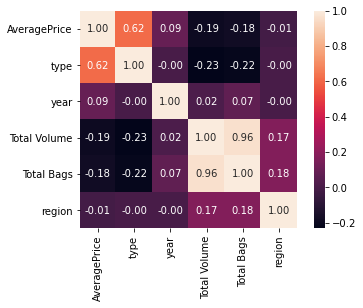

In [54]:
sns.heatmap(corrm, annot = True, square = True, fmt = ".2f")

Average price of avocados were strongly affected by the type. Besides, there was a strong correlation between total bags and total volume.

#### X and Y

In [55]:
from sklearn.model_selection import train_test_split

In [56]:
x = df.drop(["type", "Date"], axis = 1)
y = df["type"]

In [57]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, random_state = 123, test_size = 0.2)

In [58]:
X_train.shape

(14599, 13)

In [59]:
X_test.shape

(3650, 13)

#### 1. Logistic Regression

In [60]:
logreg = LogisticRegression(solver = "lbfgs", max_iter = 1000)

In [61]:
logreg.fit(X_train, Y_train)

LogisticRegression(max_iter=1000)

In [62]:
acc_logreg = logreg.score(X_train, Y_train)

In [63]:
acc_logreg

0.9506130556887458

#### 2. RandomForest

In [64]:
random_forest = RandomForestClassifier(n_estimators=100)

In [65]:
random_forest.fit(X_train, Y_train)

RandomForestClassifier()

In [66]:
acc_rf = random_forest.score(X_train, Y_train)

In [67]:
acc_rf

1.0

#### 3. k-Nearest Neighbor

In [68]:
knn = KNeighborsClassifier(n_neighbors = 3)

In [69]:
knn.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=3)

In [70]:
acc_knn = knn.score(X_train, Y_train)

In [71]:
acc_knn

0.9929447222412494

#### Comparison between Models

In [72]:
models = pd.DataFrame({
    'Model': ['KNN', 'Logistic Regression', 'Random Forest'],
    'Score': [acc_knn, acc_logreg, acc_rf]})
models.sort_values(by='Score', ascending = False)

,Model,Score
2,Random Forest,1.000000
0,KNN,0.992945
1,Logistic Regression,0.950613


Random Forest has the highest accuracy score. Let's validate the score achieved using cross validation and feature selection.

#### Cross Validation

In [73]:
classifiers = ["Random Forest", "KNN", "Logistic Regression"]

In [74]:
models = [RandomForestClassifier(), KNeighborsClassifier(n_neighbors = 3), LogisticRegression(solver = "lbfgs", max_iter = 1000)]

In [75]:
accuracy = []
mean = []
std = []

In [76]:
for i in models:
    model = i
    result = cross_val_score(model, x, y, cv = 10, scoring = "accuracy")
    accuracy.append(result)
    mean.append(result.mean())
    std.append(result.std())

In [77]:
models_df = pd.DataFrame({"CV Mean":mean, "Std":std}, index = classifiers)

In [78]:
models_df.sort_values("CV Mean", ascending = False)

,CV Mean,Std
Random Forest,0.987230,0.011527
KNN,0.947120,0.019188
Logistic Regression,0.946078,0.014835


Random forest also has the highest accuracy compared to others, however, the accuracy was not 100% as previosuly predicted.

#### Confusion Matrix

Text(0.5, 1.0, 'CM for Logreg')

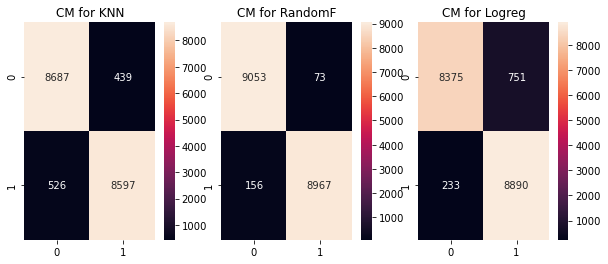

In [79]:
fig, ax = plt.subplots(1, 3, figsize = (10,4))
ypred_knn = cross_val_predict(KNeighborsClassifier(n_neighbors = 3), x, y, cv = 10)
knn_hm = sns.heatmap(confusion_matrix(y, ypred_knn), ax = ax[0], annot = True, fmt = "2.0f")
ax[0].set_title("CM for KNN")

ypred_rf = cross_val_predict(RandomForestClassifier(), x, y, cv = 10)
rf_hm = sns.heatmap(confusion_matrix(y, ypred_rf), ax = ax[1], annot = True, fmt = "2.0f")
ax[1].set_title("CM for RandomF")

ypred_logreg = cross_val_predict(LogisticRegression(solver='lbfgs', max_iter=1000), x, y, cv = 10)
logreg_hm = sns.heatmap(confusion_matrix(y, ypred_logreg), ax = ax[2], annot = True, fmt = "2.0f")
ax[2].set_title("CM for Logreg")

Random Forest, 9061 (True Positive) + 8969 (True Negative) / 18249 (Total) = 0.988, nearly the same as preducted value in CV mean of cross-validation.

Random Forest predicted for 65 conventional avocados to be organic and 154 organic avocadoes to be conventional. However, random forest has higher chance in correctly predicting both types of avocadoes.

#### Hyper-Parameters Tuning

In [92]:
models_df.sort_values("CV Mean", ascending = False)

,CV Mean,Std
Random Forest,0.987230,0.011527
KNN,0.947120,0.019188
Logistic Regression,0.946078,0.014835


#### 1. Random Forest

In [90]:
n_estimators=range(100,1000,100)
hyper={'n_estimators':n_estimators}
gd=GridSearchCV(estimator=RandomForestClassifier(),param_grid=hyper,verbose=True)
gd.fit(x,y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:  9.9min finished


0.9876148466271486
RandomForestClassifier(n_estimators=300)


The best score for random forest was 98.76% with n_estimators = 300, where previously calculated by CV Mean was 98.72%.

#### 2. KNearest Neighbor

In [91]:
n_neighbors=range(1,5)
hyper={'n_neighbors':n_neighbors}
gd=GridSearchCV(estimator=KNeighborsClassifier(),param_grid=hyper,verbose=True)
gd.fit(x,y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0.9506821084402933
KNeighborsClassifier(n_neighbors=3)


[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    5.0s finished


The best score for knn was 95.07% with n_neighbors = 3, where previously calculated by CV Mean was 94.71%.

#### Feature Selection

In [80]:
importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(random_forest.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances.head(15)

,importance
feature,
Total Volume,0.199
4225,0.138
Sales,0.132
4770,0.115
Total Bags,0.088
Small Bags,0.083
4046,0.061
XLarge Bags,0.060
AveragePrice,0.052


Large bags, year and month have the least importance towards the modeling process, therefore, these features were dropped in order to evaluate whether the data was overfit.

In [81]:
x = df.drop(["type", "Date", "Large Bags", "year", "Month"], axis = 1)
y = df["type"]

In [82]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, random_state = 123, test_size = 0.2)

In [83]:
random_forest = RandomForestClassifier(n_estimators=100)

In [84]:
random_forest.fit(X_train, Y_train)

RandomForestClassifier()

In [85]:
acc_rf = random_forest.score(X_train, Y_train)

In [86]:
acc_rf

1.0

The data was  neither overfit or underfit since the accuracy was almost the same as previous.